In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [18]:
df = pd.read_excel('./G.xlsx')

In [19]:
df

,Unnamed: 0,종목코드,고유번호,종목명,대표이사,이사회 의장,일치여부,사외이사 비율,임원보수,직원보수,임원/직원 보수비율,현금배당금총액(백만원),(연결)당기순이익(백만원),배당성향(%),배당성향(ABS),최대주주 지분율
0,0,5930,126380,삼성전자,"김기남,김현석,고동진",박재완,False,54.545455,2.757000e+09,117000000.0,23.564103,20338075.0,26090846.0,77.951000,77.951000,21.07
1,1,660,164779,SK하이닉스,이석희,박정호,False,77.777778,4.580000e+08,89531000.0,5.115547,800282.0,4755102.0,16.829960,16.829960,20.07
2,2,35420,266961,NAVER,한성숙,변대규,False,57.142857,9.170000e+08,100011000.0,9.168991,59279.0,1002087.0,5.915554,5.915554,11.56
3,3,35720,258801,카카오,"여민수,조수용",김범수,False,57.142857,1.524000e+09,102000000.0,14.941176,12902.0,155624.0,8.290495,8.290495,25.44
4,4,207940,877059,삼성바이오로직스,존림,김태한,False,57.142857,6.930000e+08,81000000.0,8.555556,NaN,240975.0,0.000000,0.000000,75.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,192400,132354,쿠쿠홀딩스,구자신,구자신,True,60.000000,1.820000e+08,59500000.0,3.058824,20512.0,106711.0,19.222010,19.222010,67.70
196,196,1680,121941,대상,임정배,임정배,True,57.142857,3.840000e+08,62000000.0,6.193548,25226.0,125102.0,20.164350,20.164350,43.10
197,197,1060,149947,JW중외제약,"신영섭,이성열",NaN,True,42.857143,1.170000e+08,55500000.0,2.108108,7149.0,-15275.0,-46.802000,46.802000,39.52
198,198,115390,561866,락앤락,김성훈,박영택,False,37.500000,1.310000e+08,44750000.0,2.927374,NaN,11756.0,0.000000,0.000000,66.07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      200 non-null    int64  
 1   종목코드            200 non-null    int64  
 2   고유번호            200 non-null    int64  
 3   종목명             200 non-null    object 
 4   대표이사            200 non-null    object 
 5   이사회 의장          193 non-null    object 
 6   일치여부            197 non-null    object 
 7   사외이사 비율         200 non-null    float64
 8   임원보수            197 non-null    float64
 9   직원보수            196 non-null    float64
 10  임원/직원 보수비율      196 non-null    float64
 11  현금배당금총액(백만원)    158 non-null    float64
 12  (연결)당기순이익(백만원)  196 non-null    float64
 13  배당성향(%)         196 non-null    float64
 14  최대주주 지분율        200 non-null    float64
dtypes: float64(8), int64(3), object(4)
memory usage: 23.6+ KB


In [20]:
data = df[['종목명','사외이사 비율','임원/직원 보수비율','배당성향(ABS)']]

In [21]:
data

,종목명,사외이사 비율,임원/직원 보수비율,배당성향(ABS)
0,삼성전자,54.545455,23.564103,77.951000
1,SK하이닉스,77.777778,5.115547,16.829960
2,NAVER,57.142857,9.168991,5.915554
3,카카오,57.142857,14.941176,8.290495
4,삼성바이오로직스,57.142857,8.555556,0.000000
...,...,...,...,...
195,쿠쿠홀딩스,60.000000,3.058824,19.222010
196,대상,57.142857,6.193548,20.164350
197,JW중외제약,42.857143,2.108108,46.802000
198,락앤락,37.500000,2.927374,0.000000


In [22]:
data.describe([.1 ,.2,.3,.4, .5,.6,.7, .8, .9])

,사외이사 비율,임원/직원 보수비율,배당성향(ABS)
count,200.000000,196.000000,200.000000
mean,53.659480,6.534901,29.001030
std,12.469481,5.426098,38.297559
min,10.000000,0.310976,0.000000
10%,33.333333,1.563280,0.000000
20%,42.857143,2.285714,0.000000
30%,54.545455,2.947020,9.071172
40%,55.555556,3.741176,14.553364
50%,57.142857,4.816675,19.545145
60%,57.142857,6.183333,24.151420


In [8]:
d1 = df[['종목명','사외이사 비율']]
d2 = df[['종목명', '임원/직원 보수비율']]
d3 = df[['종목명','배당성향(%)']]

<AxesSubplot:>

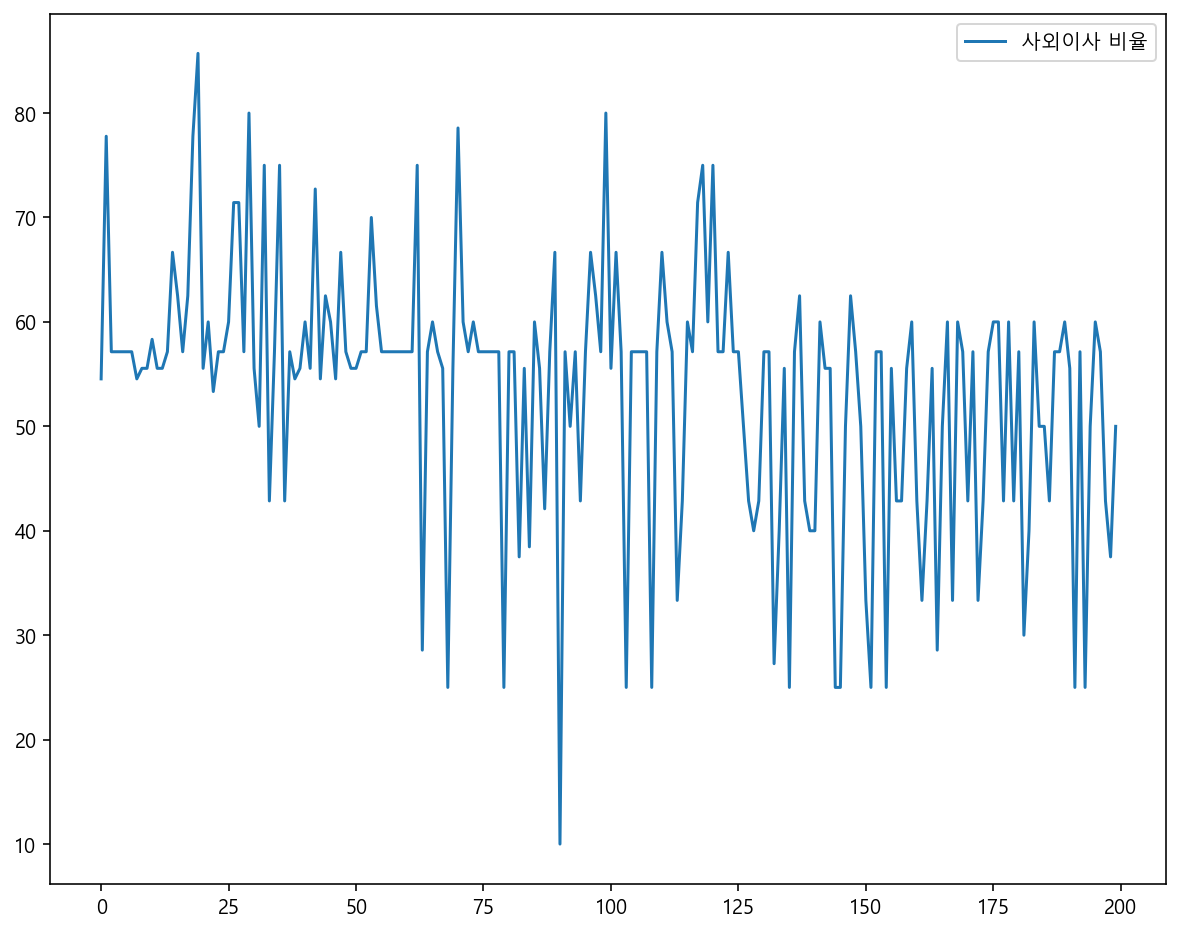

In [9]:
d1.plot(figsize=(10,8))

<AxesSubplot:>

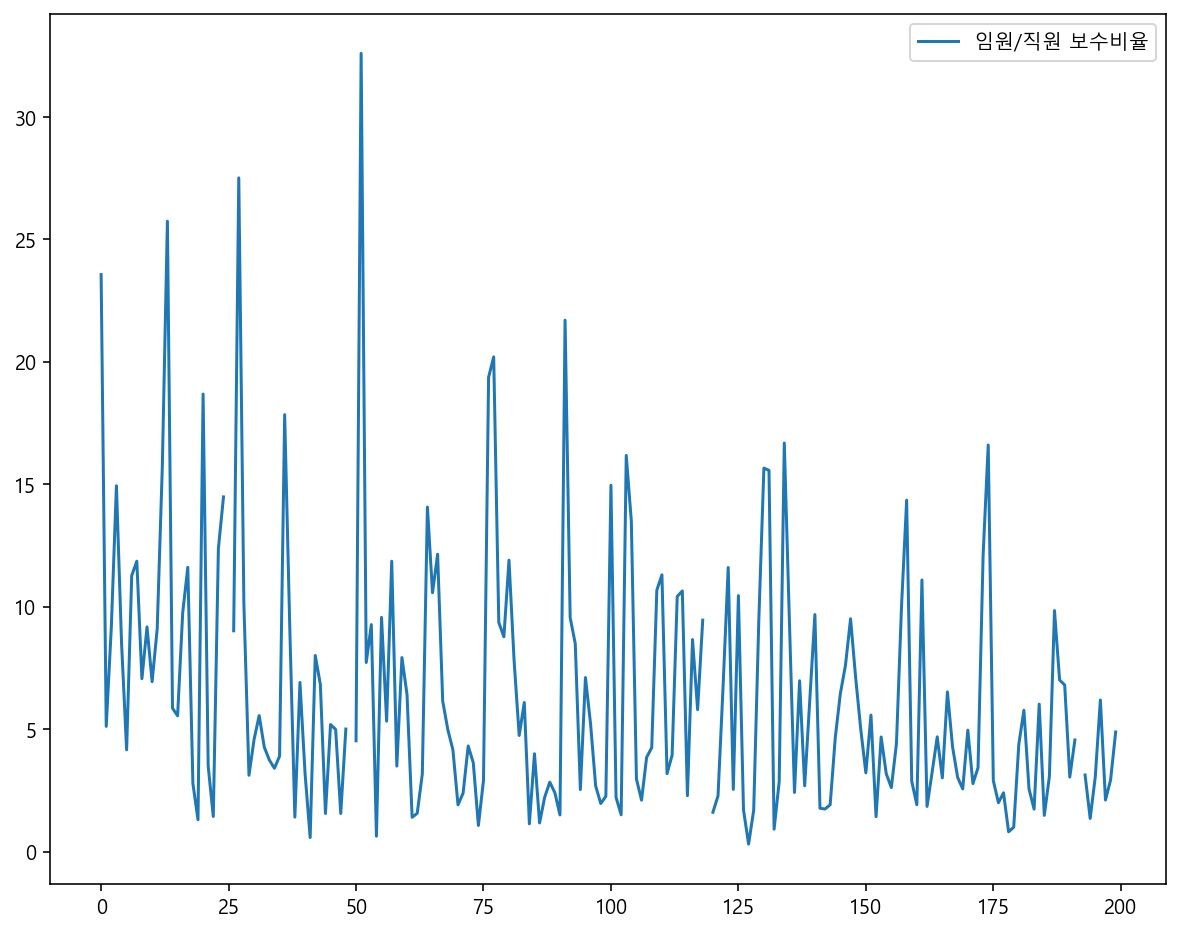

In [10]:
d2.plot(figsize=(10,8))

<AxesSubplot:>

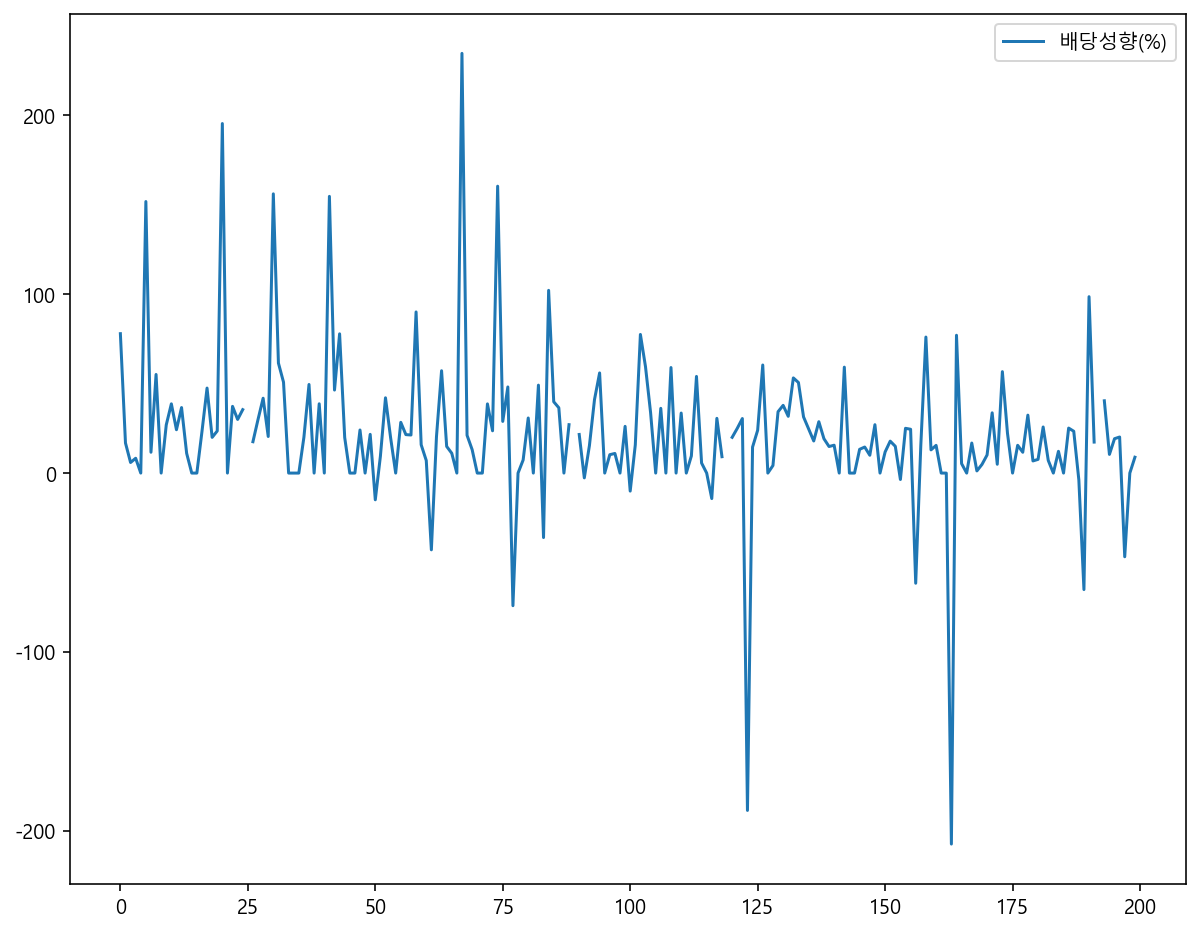

In [11]:
d3.plot(figsize=(10,8))

<AxesSubplot:>

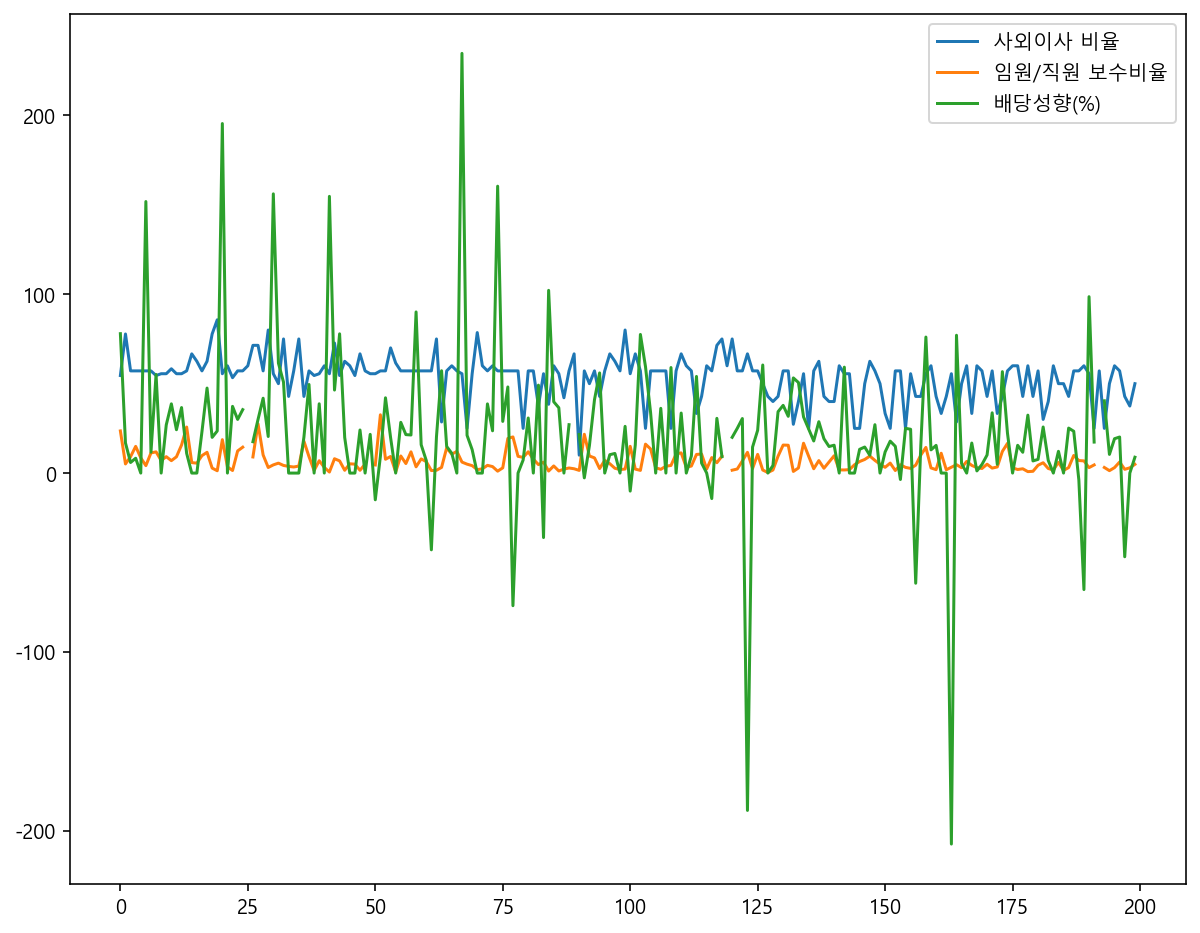

In [12]:
data.plot(figsize=(10,8))